<a href="https://colab.research.google.com/github/intTing/1/blob/main/tensors_dihedral_rotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

data = np.load('tensors_dihedral_rotation_02_02.npy', allow_pickle=True)
print(data)

[{'angle_value': 0, 'g_values': [2.0023364, 2.0047986, 2.0092354], 'g_ori': [[0.5541284, 0.3732427, 0.7440643], [0.6554551, -0.7466411, -0.113603], [0.5131475, 0.5506514, -0.6583789]], 'g_raw': array([[ 2.0052108e+00,  7.3430000e-04, -2.4825000e-03],
        [ 7.5450000e-04,  2.0058008e+00, -2.2515000e-03],
        [-2.5458000e-03, -2.3332000e-03,  2.0053587e+00]]), 'NucNames': ['17H', '18H', '19H', '20H', '21H', '22H', '23H'], 'A_values': [[-5.2948, -17.3981, -23.8474], [-6.2988, -19.8235, -27.8549], [2.7293, 5.3845, 9.3983], [3.0293, 5.8859, 9.7405], [39.1348, 40.4344, 45.8295], [44.2401, 45.8445, 51.1206], [1.6302, -1.8663, -2.0098]], 'A_ori': [[[0.4144345, -0.8996909, 0.1371144], [0.5604438, 0.3710082, 0.7404429], [-0.7170403, -0.2300202, 0.6579848]], [[0.7979136, -0.476071, -0.3697165], [0.5623873, 0.3672417, 0.7408468], [-0.2169203, -0.7990557, 0.5607634]], [[0.5596998, 0.3726959, 0.7401581], [0.8125762, -0.071516, -0.5784508], [-0.1626531, 0.9251936, -0.3428713]], [[-0.5626179, 

In [3]:
# Examine the keys and a sample of values in the first dictionary
sample_dict = data[0]
sample_dict.keys(), {k: type(v) for k, v in sample_dict.items()}

(dict_keys(['angle_value', 'g_values', 'g_ori', 'g_raw', 'NucNames', 'A_values', 'A_ori', 'A_raw', 'AtomSymbols', 'AtomCoords']),
 {'angle_value': int,
  'g_values': list,
  'g_ori': list,
  'g_raw': numpy.ndarray,
  'NucNames': list,
  'A_values': list,
  'A_ori': list,
  'A_raw': list,
  'AtomSymbols': list,
  'AtomCoords': list})

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Initialise lists
angles = []
# List to store the dihedral angle

# List to store the tensor values
a_values_hb1 = []  # Hβ₁
a_values_hb2 = []  # Hβ₂

for entry in data:
    angles.append(entry["angle_value"])
    nuc_names = entry["NucNames"]
    a_vals = entry["A_values"]

    # Find the index of Hβ₁,Hβ₂
    index_hb1 = nuc_names.index("21H")
    index_hb2 = nuc_names.index("22H")

    a_values_hb1.append(a_vals[index_hb1])
    a_values_hb2.append(a_vals[index_hb2])
    # Append the 3 principal components for Hβ₁,Hβ₂ to the lists

# Convert list to NumPy arrays
angles = np.array(angles)
a_values_hb1 = np.array(a_values_hb1)
a_values_hb2 = np.array(a_values_hb2)

Re-plot Fig. 7A in Pokern et al.: Hyperfine coupling / MHz vs dihedral angle



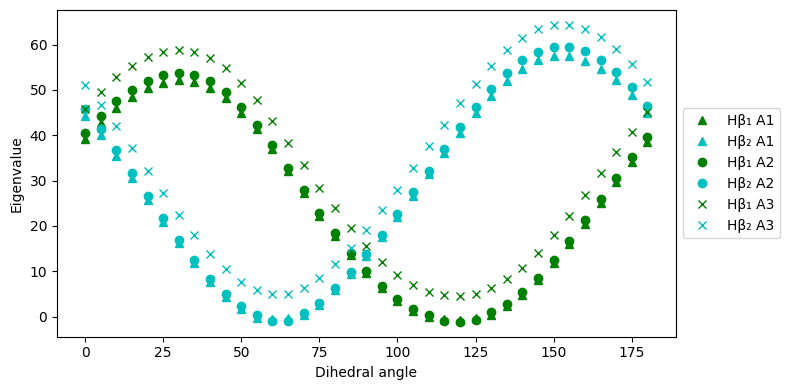

In [5]:
plt.figure(figsize=(8, 4))

# Define markers for Axx, Ayy, Azz (principal values)
markers = ['^', 'o', 'x']
colors = ['g', 'c'] # green for Hβ1, cyan for Hβ2
labels = ['Hβ₁', 'Hβ₂']

# Plot points without connecting lines (linestyle='None')
for i in range(3):  # Axx, Ayy, Azz
    plt.plot(angles, a_values_hb1[:, i], marker=markers[i], linestyle='None', color=colors[0],
             label=f'{labels[0]} A{i+1}')
    plt.plot(angles, a_values_hb2[:, i], marker=markers[i], linestyle='None', color=colors[1],
             label=f'{labels[1]} A{i+1}')

plt.xlabel("Dihedral angle")
#plt.ylabel("Hyperfine coupling / MHz")
plt.ylabel("Eigenvalue")
# plt.title("Fig. 7A: Hyperfine coupling vs dihedral angle")
#plt.legend()
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
# plt.grid(True)
plt.tight_layout()
plt.show()

period 2$pi$

start with one eigenvalue → then 3

In [6]:
print(data[0])

{'angle_value': 0, 'g_values': [2.0023364, 2.0047986, 2.0092354], 'g_ori': [[0.5541284, 0.3732427, 0.7440643], [0.6554551, -0.7466411, -0.113603], [0.5131475, 0.5506514, -0.6583789]], 'g_raw': array([[ 2.0052108e+00,  7.3430000e-04, -2.4825000e-03],
       [ 7.5450000e-04,  2.0058008e+00, -2.2515000e-03],
       [-2.5458000e-03, -2.3332000e-03,  2.0053587e+00]]), 'NucNames': ['17H', '18H', '19H', '20H', '21H', '22H', '23H'], 'A_values': [[-5.2948, -17.3981, -23.8474], [-6.2988, -19.8235, -27.8549], [2.7293, 5.3845, 9.3983], [3.0293, 5.8859, 9.7405], [39.1348, 40.4344, 45.8295], [44.2401, 45.8445, 51.1206], [1.6302, -1.8663, -2.0098]], 'A_ori': [[[0.4144345, -0.8996909, 0.1371144], [0.5604438, 0.3710082, 0.7404429], [-0.7170403, -0.2300202, 0.6579848]], [[0.7979136, -0.476071, -0.3697165], [0.5623873, 0.3672417, 0.7408468], [-0.2169203, -0.7990557, 0.5607634]], [[0.5596998, 0.3726959, 0.7401581], [0.8125762, -0.071516, -0.5784508], [-0.1626531, 0.9251936, -0.3428713]], [[-0.5626179, -0.

# **check：A_raw = A_ori^T · diag(A_values) · A_ori**

In [9]:
# Function to check A_raw = A_ori^T · diag(A_values) · A_ori
def check_A_tensor_decomposition(entry):
    results = []
    for i, (A_ori, A_values, A_raw) in enumerate(zip(entry["A_ori"], entry["A_values"], entry["A_raw"])):
        A_ori = np.array(A_ori) # Convert list of eigenvectors to NumPy array (3x3)
        A_values = np.diag(A_values) # Convert list of eigenvalues to a 3x3 diagonal matrix
        reconstructed = A_ori.T @ A_values @ A_ori # Reconstruct A_raw using eigen-decomposition formula

        difference = np.linalg.norm(A_raw - reconstructed) # Compute Frobenius norm difference between reconstructed tensor and original
        results.append((i, difference, np.allclose(A_raw, reconstructed, atol=1e-1))) # check whether matrices are close within tolerance
    return results

# Apply check on the first entry
check_results = check_A_tensor_decomposition(data[15]) # i = 0,1,...,36 can be changed
# check_results = check_A_tensor_decomposition(data[i]) # i = 0,1,...,36
check_results


[(0, np.float64(0.03405807861928949), True),
 (1, np.float64(0.03760701949792027), True),
 (2, np.float64(0.0074846765226452725), True),
 (3, np.float64(0.008259440342403503), True),
 (4, np.float64(0.0017211294088851081), True),
 (5, np.float64(0.002804423151645051), True),
 (6, np.float64(0.0009178469984060749), True)]

tolerance become 1e-2

In [10]:
# Function to check A_raw = A_ori^T · diag(A_values) · A_ori
def check_A_tensor_decomposition(entry):
    results = []
    for i, (A_ori, A_values, A_raw) in enumerate(zip(entry["A_ori"], entry["A_values"], entry["A_raw"])):
        A_ori = np.array(A_ori) # Convert list of eigenvectors to NumPy array (3x3)
        A_values = np.diag(A_values) # Convert list of eigenvalues to a 3x3 diagonal matrix
        reconstructed = A_ori.T @ A_values @ A_ori # Reconstruct A_raw using eigen-decomposition formula

        difference = np.linalg.norm(A_raw - reconstructed) # Compute Frobenius norm difference between reconstructed tensor and original
        results.append((i, difference, np.allclose(A_raw, reconstructed, atol=1e-2))) # check whether matrices are close within tolerance
    return results

# Apply check on the first entry
check_results = check_A_tensor_decomposition(data[i]) # i = 0,1,...,36 can be changed
check_results

[(0, np.float64(0.04093460120978046), False),
 (1, np.float64(0.03923093312969239), False),
 (2, np.float64(0.008640003145008353), True),
 (3, np.float64(0.00978642807456597), True),
 (4, np.float64(0.001522271746924251), True),
 (5, np.float64(0.001762868103548995), True),
 (6, np.float64(0.0010112619255412596), True)]

tolerance become 1e-3

In [11]:
# Function to check A_raw = A_ori^T · diag(A_values) · A_ori
def check_A_tensor_decomposition(entry):
    results = []
    for i, (A_ori, A_values, A_raw) in enumerate(zip(entry["A_ori"], entry["A_values"], entry["A_raw"])):
        A_ori = np.array(A_ori) # Convert list of eigenvectors to NumPy array (3x3)
        A_values = np.diag(A_values) # Convert list of eigenvalues to a 3x3 diagonal matrix
        reconstructed = A_ori.T @ A_values @ A_ori # Reconstruct A_raw using eigen-decomposition formula

        difference = np.linalg.norm(A_raw - reconstructed) # Compute Frobenius norm difference between reconstructed tensor and original
        results.append((i, difference, np.allclose(A_raw, reconstructed, atol=1e-3))) # check whether matrices are close within tolerance
    return results

# Apply check on the first entry
check_results = check_A_tensor_decomposition(data[i]) # i = 0,1,...,36 can be changed
check_results

[(0, np.float64(0.04093460120978046), False),
 (1, np.float64(0.03923093312969239), False),
 (2, np.float64(0.008640003145008353), False),
 (3, np.float64(0.00978642807456597), False),
 (4, np.float64(0.001522271746924251), False),
 (5, np.float64(0.001762868103548995), False),
 (6, np.float64(0.0010112619255412596), True)]

In [12]:
# Take an entry, for example the 15th
entry = data[15]

# Take A_ori, A_values, A_raw
A_ori = np.array(entry["A_ori"][0])      # 3x3 orientation matrix
A_values = np.diag(entry["A_values"][0]) # Diagonalization
A_raw = np.array(entry["A_raw"][0])      # Original 3x3 matrix

# Reconstructing the Matrix
reconstructed = A_ori.T @ A_values @ A_ori

# Calculate the difference
diff = A_raw - reconstructed
fro = np.linalg.norm(diff)                      # Frobenius norm
fro_rel = fro / np.linalg.norm(A_raw)           # relative Frobenius norm
linf = np.max(np.abs(diff))                     # max entrywise error

ok_1e1 = np.allclose(A_raw, reconstructed, atol=1e-1, rtol=1e-5)
ok_1e2 = np.allclose(A_raw, reconstructed, atol=1e-2, rtol=1e-5)
ok_1e3 = np.allclose(A_raw, reconstructed, atol=1e-3, rtol=1e-5)

print(f"||Δ||_F = {fro:.3e}, rel = {fro_rel:.3e}, ||Δ||_∞ = {linf:.3e}, "
      f"allclose(1e-1/1e-2/1e-3) = {ok_1e1}/{ok_1e2}/{ok_1e3}")


||Δ||_F = 3.406e-02, rel = 1.033e-03, ||Δ||_∞ = 2.024e-02, allclose(1e-1/1e-2/1e-3) = True/False/False


Print out A_raw (hyperfine matrix), A_values ​​(principal values), and A_ori (rotation matrix) of 21H at a certain angle, and explain/check the relationship between them.

In [15]:
# Get the data of the first angle
rec0 = data[0]   # have angle_value, NucNames, A_raw, A_values, A_ori etc.

# Find the index of 21H
idx_21 = rec0["NucNames"].index("21H")

A_raw   = np.array(rec0["A_raw"][idx_21])     # 3x3 hyperfine matrix
A_vals  = np.array(rec0["A_values"][idx_21])  # [A1, A2, A2]
A_ori   = np.array(rec0["A_ori"][idx_21])     # 3x3 rotation matrix

print("Angle (deg):", rec0["angle_value"])
print("\n--- 21H Hyperfine Tensor (A_raw) ---")
print(A_raw)

print("\n--- Eigenvalues (A_values: A1, A2, A3) ---")
print(A_vals)

print("\n--- Rotation matrix to principal axes (A_ori) ---")
print(A_ori)

# Check: A_raw ≈ A_ori.T @ diag(A_values) @ A_ori
recon = A_ori.T @ np.diag(A_vals) @ A_ori
print("\n--- Reconstructed A_raw from eigen-decomposition ---")
print(recon)
print("\nDifference (A_raw - reconstructed):")
print(A_raw - recon)


Angle (deg): 0

--- 21H Hyperfine Tensor (A_raw) ---
[[44.8111  1.388  -1.5982]
 [ 1.3898 40.3555 -1.146 ]
 [-1.5978 -1.1463 40.232 ]]

--- Eigenvalues (A_values: A1, A2, A3) ---
[39.1348 40.4344 45.8295]

--- Rotation matrix to principal axes (A_ori) ---
[[-0.0545796 -0.6497632 -0.7581747]
 [ 0.4301241 -0.7005458  0.5694109]
 [-0.9011184 -0.295031   0.3177143]]

--- Reconstructed A_raw from eigen-decomposition ---
[[44.81142913  1.38824286 -1.59838516]
 [ 1.38824286 40.35532322 -1.14593843]
 [-1.59838516 -1.14593843 40.23194763]]

Difference (A_raw - reconstructed):
[[-3.29128769e-04 -2.42859891e-04  1.85156728e-04]
 [ 1.55714011e-03  1.76780240e-04 -6.15684801e-05]
 [ 5.85156728e-04 -3.61568480e-04  5.23735628e-05]]


# Use the data set to analyze the regression problem

Example image (A11 at 21H/22H)
Model

c(α) = β3 * cos( β2 * (δ - β1) ) + β4

α can be in degrees (default) or radians. Internally we fit in radians.

Estimated parameters for 21H A1:
  beta1 = 0.483 ± 1.96*0.005
  beta2 = 1.982 ± 1.96*0.006
  beta3 = 27.697 ± 1.96*0.152
  beta4 = 29.488 ± 1.96*0.117
R^2 = 0.9990


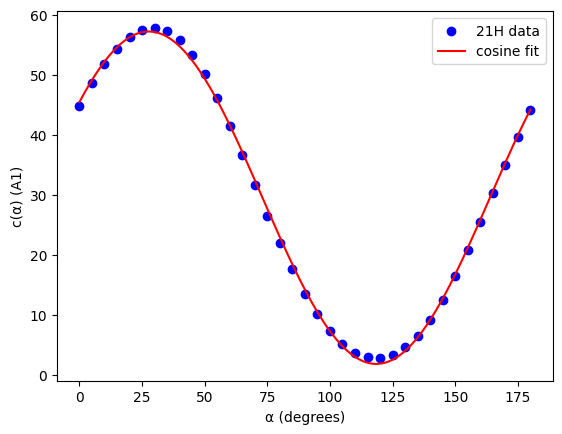

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Convert .npy files to df and change to own path
path = "tensors_dihedral_rotation_02_02.npy"
data = np.load(path, allow_pickle=True)

records = []
for rec in data:
    angle = rec["angle_value"]       # angle
    names = rec["NucNames"]          # ['17H','18H',...,'21H','22H']
    A_raw_list = rec["A_raw"]        # 3x3 tensor per core
    for name, A in zip(names, A_raw_list):
        A = np.array(A, dtype=float)
        records.append({
            "angle_deg": angle, # Independent variable
            "nucleus": name,
            "A1": A[0,0],   # Only take the A11 component # Dependent variable
        })

df = pd.DataFrame(records)

# Cosine regression model
# c(α) = β3 * cos( β2 * (δ - β1) ) + β4
# α is degree
"""   Parameters
    delta : array-like. Predictor variable (angle).
    beta1 : float. Phase shift parameter (horizontal shift of cosine).
    beta2: float. Frequency scaling parameter (controls oscillation speed).
    beta3 : float. parameter that scales the cosine wave vertically.
    beta4 : float. offset.

    Returns
    c(delta) : array-like. Predicted values from the cosine regression model.
"""
def cosine_model(delta, beta1, beta2, beta3, beta4):
    delta_rad = np.radians(delta)  # Angle to radian: The input x of the cosine function cos(x) is in radians.
    return beta3 * np.cos(beta2 * (delta_rad - beta1)) + beta4


# Take the A1 of 21H as an example for regression
sub = df[df["nucleus"]=="21H"]
# change to sub = df[df["nucleus"]=="22H"]: get the A1 of 22H
x_data = sub["angle_deg"].values
y_data = sub["A1"].values

# Estimate parameters using nonlinear least squares (curve_fit)

# Given initial guesses: (beta1, beta2, beta3, beta4)
# Initial values ​​are important for convergence and can be roughly estimated based on the graph
initial_guess = (0.0, 1.0, 1.0, np.mean(y_data)) # guess of initial values
params, cov = curve_fit(cosine_model, x_data, y_data, p0=initial_guess) # A model function, independent variable data, dependent variable observations, and initial parameter guesses
beta1, beta2, beta3, beta4 = params
stderr = np.sqrt(np.diag(cov))  # Parameter standard error (standard deviation)

# (R^2) Goodness of fit
y_pred = cosine_model(x_data, *params)
# y_pred = cosine_model(x_data, params[0], params[1], params[2], params[3])
ss_res = np.sum((y_data - y_pred)**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r2 = 1 - ss_res/ss_tot

# output results
print("Estimated parameters for 21H A1:")
print(f"  beta1 = {beta1:.3f} ± 1.96*{stderr[0]:.3f}") # Estimate +- 1.96*Standard Error
print(f"  beta2 = {beta2:.3f} ± 1.96*{stderr[1]:.3f}")
print(f"  beta3 = {beta3:.3f} ± 1.96*{stderr[2]:.3f}")
print(f"  beta4 = {beta4:.3f} ± 1.96*{stderr[3]:.3f}")
print(f"R^2 = {r2:.4f}")

# plot
x_grid = np.linspace(min(x_data), max(x_data), 500) # 500 point on x axis
y_grid = cosine_model(x_grid, *params)

plt.scatter(x_data, y_data, color="blue", label="21H data")
plt.plot(x_grid, y_grid, color="red", label="cosine fit")
plt.xlabel("α (degrees)")
plt.ylabel("c(α) (A1)")
plt.legend()
plt.show()


21H A1 Regression parameters:
  Beta1=0.492, Beta2=1.984, Beta3=26.714, Beat4=24.772
  R² = 0.9988

21H A1 parameters:
  Beta1=0.492 ± 1.96*0.005 (radian)
  Beta2=1.984 ± 1.96*0.007
  Beta3=26.714 ± 1.96*0.161
  Beta4=24.772 ± 1.96*0.123
  AIC = -24.35

21H A2 Regression parameters:
  Beta1=0.489, Beta2=1.982, Beta3=27.449, Beat4=25.586
  R² = 0.9989

21H A2 parameters:
  Beta1=0.489 ± 1.96*0.005 (radian)
  Beta2=1.982 ± 1.96*0.007
  Beta3=27.449 ± 1.96*0.158
  Beta4=25.586 ± 1.96*0.120
  AIC = -25.88

21H A3 Regression parameters:
  Beta1=0.490, Beta2=1.986, Beta3=27.333, Beat4=30.990
  R² = 0.9991

21H A3 parameters:
  Beta1=0.490 ± 1.96*0.005 (radian)
  Beta2=1.986 ± 1.96*0.006
  Beta3=27.333 ± 1.96*0.146
  Beta4=30.990 ± 1.96*0.111
  AIC = -31.54



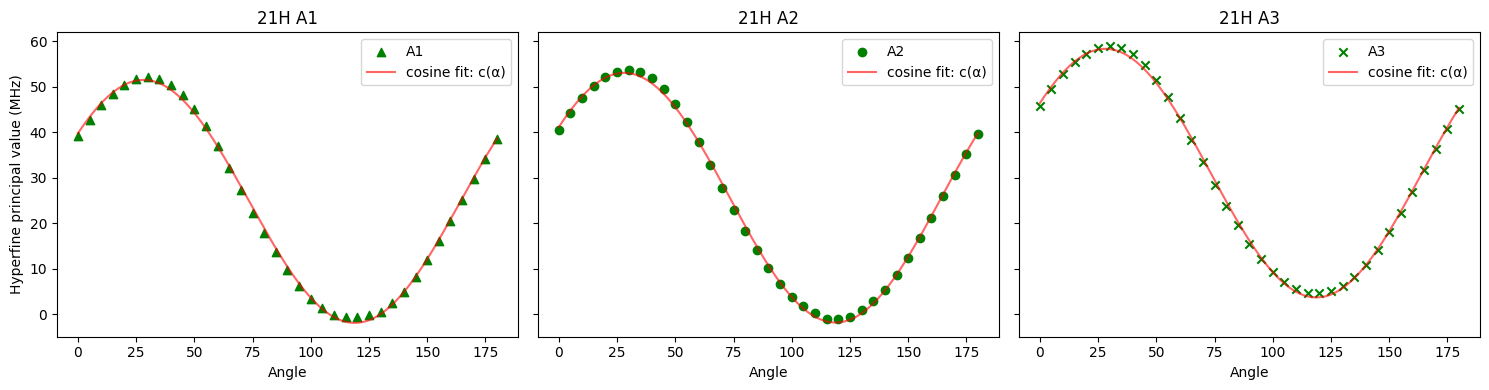

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

path = "tensors_dihedral_rotation_02_02.npy"
data = np.load(path, allow_pickle=True)

# Extract the eigenvalues of 21H Axx, Ayy, Azz (A1, A2, A3) at all angles
angles = []
Axx, Ayy, Azz = [], [], []

for rec in data:
    if "21H" in rec["NucNames"]:
        idx = rec["NucNames"].index("21H")
        vals = np.array(rec["A_values"][idx])  # [Axx, Ayy, Azz]
        angles.append(rec["angle_value"])
        Axx.append(vals[0])
        Ayy.append(vals[1])
        Azz.append(vals[2])

angles = np.array(angles, dtype=float)
Axx = np.array(Axx, dtype=float)
Ayy = np.array(Ayy, dtype=float)
Azz = np.array(Azz, dtype=float)

# Sort by angle to ensure that the drawing and fitting are consistent
order = np.argsort(angles)
angles = angles[order]
Axx, Ayy, Azz = Axx[order], Ayy[order], Azz[order]

# Cosine regression model c(α) = β3 * cos( β2 * (α - β1) ) + β4
def cosine_model(delta_deg, beta1, beta2, beta3, beta4):
    delta_rad = np.radians(delta_deg)  # Angle -> Radians
    return beta3 * np.cos(beta2 * (delta_rad - beta1)) + beta4

def fit_cosine(x, y):
    # Simple and robust initial values: phase 0, frequency 1, amplitude ≈ (max-min)/2, offset is mean
    amp0 = 0.5 * (np.max(y) - np.min(y))
    p0 = (0.0, 1.0, amp0 if amp0 > 0 else 1.0, float(np.mean(y)))
    params, cov = curve_fit(cosine_model, x, y, p0=p0, maxfev=20000)
    return params, cov

# markers & labels (matching the shapes of Fig. 7A)
markers = ['^', 'o', 'x']
labels  = ['A1', 'A2', 'A3']
data_list = [Axx, Ayy, Azz]

# 1×3 subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

x_grid = np.linspace(angles.min(), angles.max(), 600)

for i, ax in enumerate(axes):
    y = data_list[i] # yi is one of the eigenvalues ​​Axx/Ayy/Azz in the tensor 21H
    # Fitting
    params, cov = fit_cosine(angles, y)
    y_fit = cosine_model(x_grid, *params)

    y_pred = cosine_model(angles, *params)
    r2 = r2_score(y, y_pred) # compute R²
    # Print results
    print(f"21H {labels[i]} Regression parameters:")
    print(f"  Beta1={params[0]:.3f}, Beta2={params[1]:.3f}, Beta3={params[2]:.3f}, Beat4={params[3]:.3f}")
    print(f"  R² = {r2:.4f}\n")

    # Parameter standard error, SE=sqrt(cov)
    stderr = np.sqrt(np.diag(cov))

    # Print results
    print(f"21H {labels[i]} parameters:")
    print(f"  Beta1={params[0]:.3f} ± 1.96*{stderr[0]:.3f} (radian)")
    print(f"  Beta2={params[1]:.3f} ± 1.96*{stderr[1]:.3f}")
    print(f"  Beta3={params[2]:.3f} ± 1.96*{stderr[2]:.3f}")
    print(f"  Beta4={params[3]:.3f} ± 1.96*{stderr[3]:.3f}")

    # Residual sum of squares
    rss = np.sum((y - y_pred)**2)
    n = len(y)
    k = len(params)  # here = 4
    # AIC calculation
    aic = n * np.log(rss / n) + 2 * k
    print(f"  AIC = {aic:.2f}\n")


    # Scatter points + fitted line
    ax.scatter(angles, y, marker=markers[i], color='g', label=labels[i])
    ax.plot(x_grid, y_fit, color='r', lw=1.5, alpha=0.6, label='cosine fit: c(α)')
    # Axes and Titles
    ax.set_title(f"21H {labels[i]}")
    ax.set_xlabel("Angle")
    if i == 0:
        ax.set_ylabel("Hyperfine principal value (MHz)")
    ax.legend()
    #ax.grid(True, alpha=0.25)

plt.tight_layout()
plt.show()


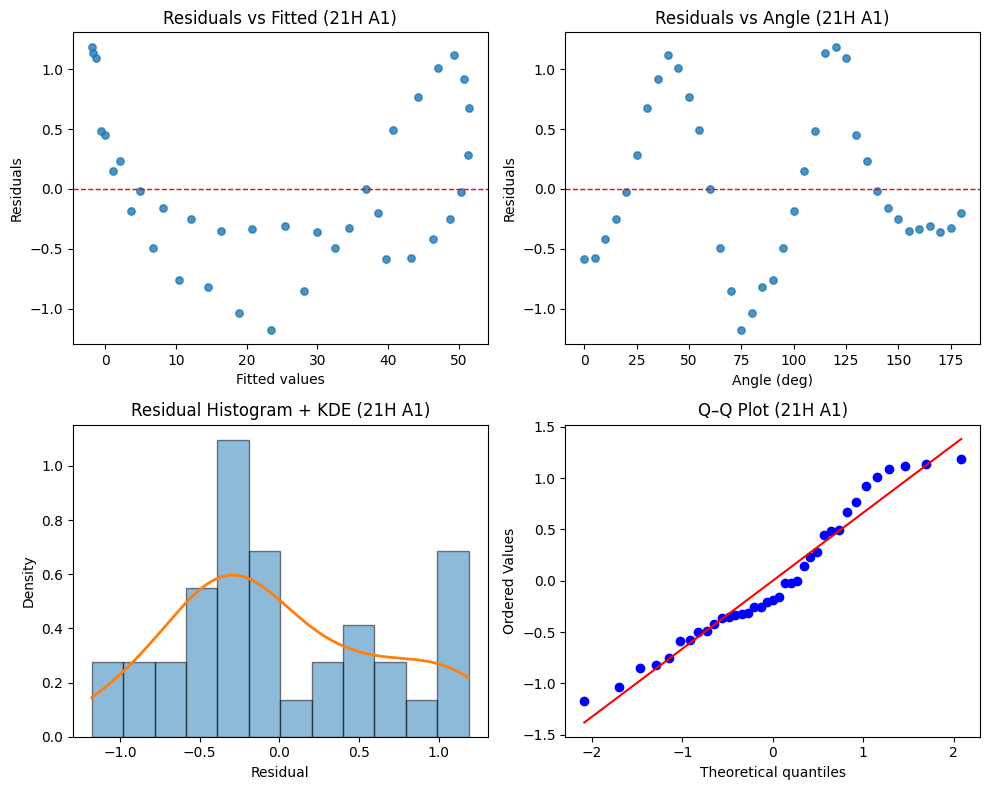

In [23]:
# we have already extracted Axx, Ayy, Azz of 21H
x = angles           # Independent variable (deg)
y = Axx              # Dependent variable, here specify Axx (A1)

# Regression fitting
params, cov = fit_cosine(x, y)
y_pred = cosine_model(x, *params)
residuals = y - y_pred

# Next, we use residuals to draw four diagnostic plots
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
(ax1, ax2), (ax3, ax4) = axes

# 1) Residuals vs. Fitted Values ​​(Residuals vs. Predicted Values)
ax1.scatter(y_pred, residuals, s=28, alpha=0.8)
ax1.axhline(0, color='r', ls='--', lw=1)
ax1.set_xlabel("Fitted values")
ax1.set_ylabel("Residuals")
ax1.set_title("Residuals vs Fitted (21H A1)")

# 2) Residuals vs. independent variables (angles)
ax2.scatter(x, residuals, s=28, alpha=0.8)
ax2.axhline(0, color='r', ls='--', lw=1)
ax2.set_xlabel("Angle (deg)")
ax2.set_ylabel("Residuals")
ax2.set_title("Residuals vs Angle (21H A1)")

# 3) Residual Histogram (with Kernel Density) KDE
ax3.hist(residuals, bins=12, density=True, alpha=0.5, edgecolor='k')
# Overlay kernel density curves (using scipy.stats.gaussian_kde)
xs = np.linspace(residuals.min(), residuals.max(), 256)
kde = stats.gaussian_kde(residuals)
ax3.plot(xs, kde(xs), lw=2)
ax3.set_xlabel("Residual")
ax3.set_ylabel("Density")
ax3.set_title("Residual Histogram + KDE (21H A1)")

# 4) QQ plot (normality test visualization)
stats.probplot(residuals, dist="norm", plot=ax4)
ax4.set_title("Q–Q Plot (21H A1)")

plt.tight_layout()
plt.show()


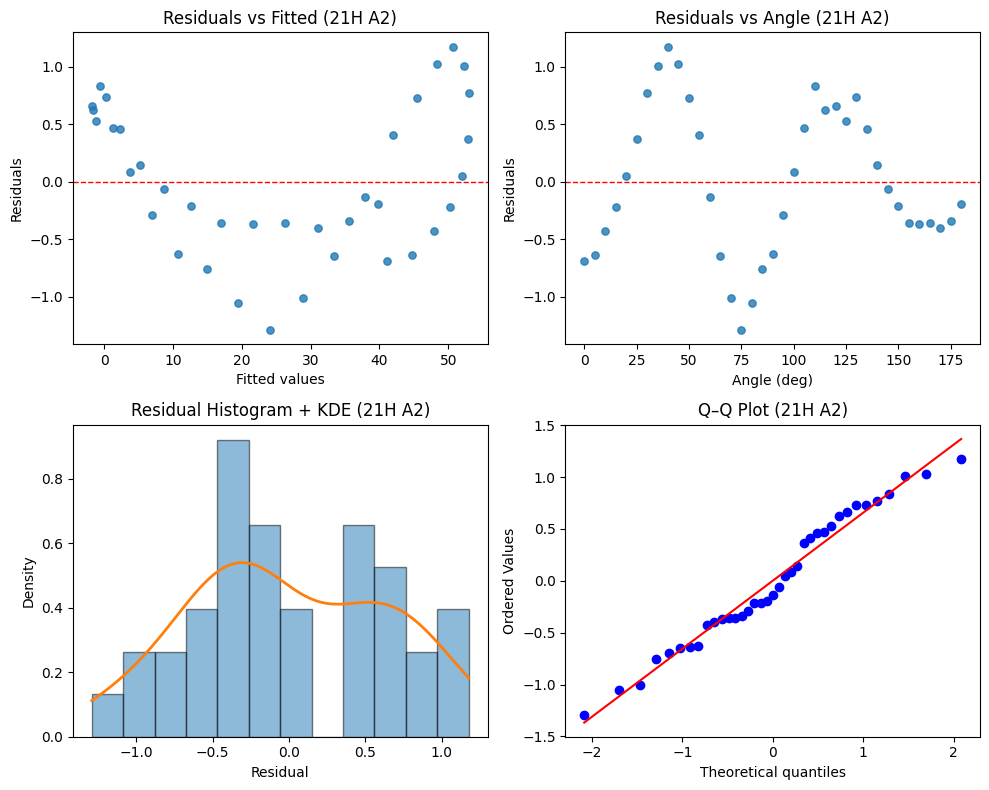

In [22]:
x = angles           # Independent variable (deg)
y = Ayy              # Dependent variable, here specify Ayy (A2)

# Regression fitting
params, cov = fit_cosine(x, y)
y_pred = cosine_model(x, *params)
residuals = y - y_pred

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
(ax1, ax2), (ax3, ax4) = axes

# 1) Residuals vs. Fitted Values
ax1.scatter(y_pred, residuals, s=28, alpha=0.8)
ax1.axhline(0, color='r', ls='--', lw=1)
ax1.set_xlabel("Fitted values")
ax1.set_ylabel("Residuals")
ax1.set_title("Residuals vs Fitted (21H A2)")

# 2) Residuals vs. independent variables (angles)
ax2.scatter(x, residuals, s=28, alpha=0.8)
ax2.axhline(0, color='r', ls='--', lw=1)
ax2.set_xlabel("Angle (deg)")
ax2.set_ylabel("Residuals")
ax2.set_title("Residuals vs Angle (21H A2)")

# 3) Residual Histogram (with Kernel Density) KDE
ax3.hist(residuals, bins=12, density=True, alpha=0.5, edgecolor='k')
xs = np.linspace(residuals.min(), residuals.max(), 256)
kde = stats.gaussian_kde(residuals)
ax3.plot(xs, kde(xs), lw=2)
ax3.set_xlabel("Residual")
ax3.set_ylabel("Density")
ax3.set_title("Residual Histogram + KDE (21H A2)")

# 4) QQ plot (normality test visualization)
stats.probplot(residuals, dist="norm", plot=ax4)
ax4.set_title("Q–Q Plot (21H A2)")

plt.tight_layout()
plt.show()

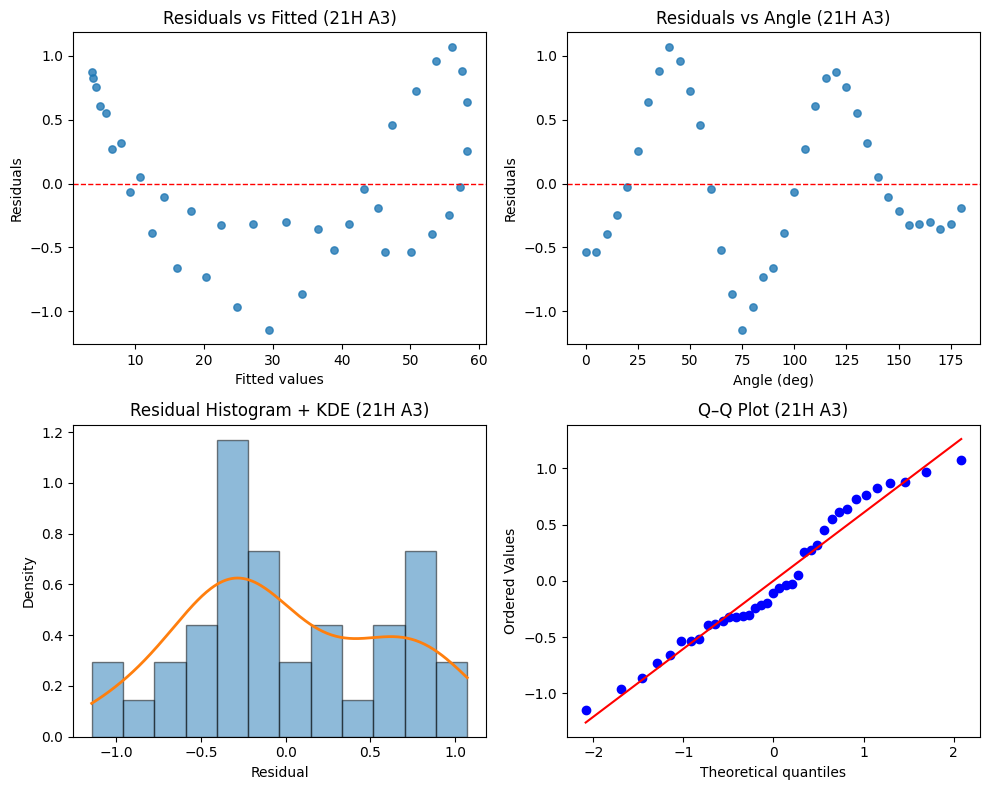

In [24]:
x = angles           # Independent variable (deg)
y = Azz              # Dependent variable, here specify Azz (A3)

# Regression fitting
params, cov = fit_cosine(x, y)
y_pred = cosine_model(x, *params)
residuals = y - y_pred

# Next, we use residuals to draw four diagnostic plots
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
(ax1, ax2), (ax3, ax4) = axes

# 1) Residuals vs. Fitted Values ​​(Residuals vs. Predicted Values)
ax1.scatter(y_pred, residuals, s=28, alpha=0.8)
ax1.axhline(0, color='r', ls='--', lw=1)
ax1.set_xlabel("Fitted values")
ax1.set_ylabel("Residuals")
ax1.set_title("Residuals vs Fitted (21H A3)")

# 2) Residuals vs. independent variables (angles)
ax2.scatter(x, residuals, s=28, alpha=0.8)
ax2.axhline(0, color='r', ls='--', lw=1)
ax2.set_xlabel("Angle (deg)")
ax2.set_ylabel("Residuals")
ax2.set_title("Residuals vs Angle (21H A3)")

# 3) Residual Histogram (with Kernel Density) KDE
ax3.hist(residuals, bins=12, density=True, alpha=0.5, edgecolor='k')
# Overlay kernel density curves (using scipy.stats.gaussian_kde)
xs = np.linspace(residuals.min(), residuals.max(), 256)
kde = stats.gaussian_kde(residuals)
ax3.plot(xs, kde(xs), lw=2)
ax3.set_xlabel("Residual")
ax3.set_ylabel("Density")
ax3.set_title("Residual Histogram + KDE (21H A3)")

# 4) QQ plot (normality test visualization)
stats.probplot(residuals, dist="norm", plot=ax4)
ax4.set_title("Q–Q Plot (21H A3)")

plt.tight_layout()
plt.show()

# 22H

22H A1 Regression parameters:
  Beta1=-0.496, Beta2=-1.993, Beta3=28.787, Beat4=28.568
  R² = 0.9996

22H A1 parameters:
  Beta1=-0.496 ± 1.96*0.004 (radian)
  Beta2=-1.993 ± 1.96*0.004
  Beta3=28.787 ± 1.96*0.097
  Beta4=28.568 ± 1.96*0.074
22H A2 Regression parameters:
  Beta1=-2.074, Beta2=-1.990, Beta3=-29.669, Beat4=29.621
  R² = 0.9996

22H A2 parameters:
  Beta1=-2.074 ± 1.96*0.008 (radian)
  Beta2=-1.990 ± 1.96*0.004
  Beta3=-29.669 ± 1.96*0.109
  Beta4=29.621 ± 1.96*0.084
22H A3 Regression parameters:
  Beta1=-0.492, Beta2=-1.993, Beta3=29.351, Beat4=34.931
  R² = 0.9996

22H A3 parameters:
  Beta1=-0.492 ± 1.96*0.004 (radian)
  Beta2=-1.993 ± 1.96*0.004
  Beta3=29.351 ± 1.96*0.101
  Beta4=34.931 ± 1.96*0.078


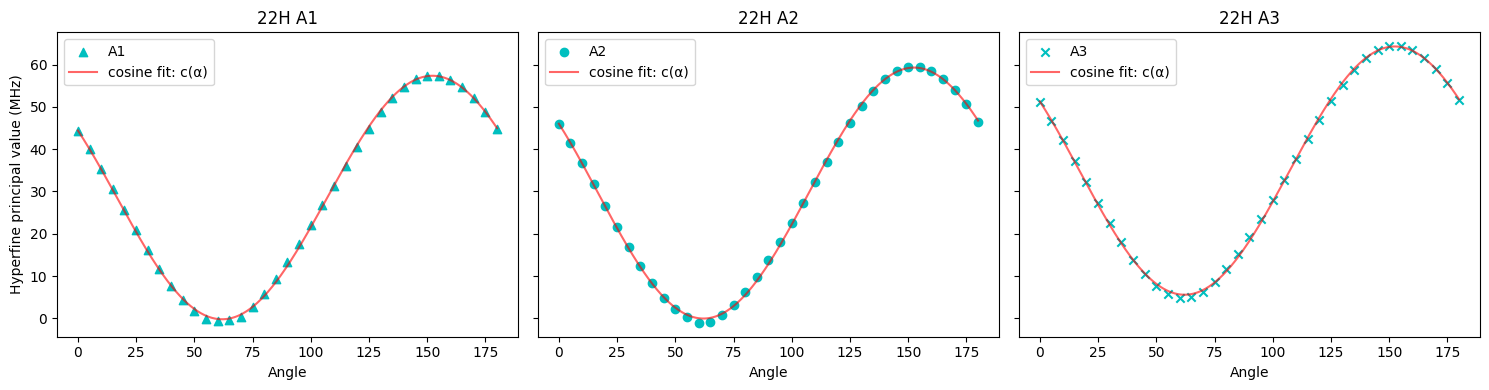

In [25]:
# Extract the eigenvalues of 22H at all angles
angles = []
Axx, Ayy, Azz = [], [], []

for rec in data:
    if "22H" in rec["NucNames"]:
        idx = rec["NucNames"].index("22H")
        vals = np.array(rec["A_values"][idx])  # [Axx, Ayy, Azz]
        angles.append(rec["angle_value"])
        Axx.append(vals[0])
        Ayy.append(vals[1])
        Azz.append(vals[2])

angles = np.array(angles, dtype=float)
Axx = np.array(Axx, dtype=float)
Ayy = np.array(Ayy, dtype=float)
Azz = np.array(Azz, dtype=float)

order = np.argsort(angles)
angles = angles[order]
Axx, Ayy, Azz = Axx[order], Ayy[order], Azz[order]

# Cosine regression model
def cosine_model(delta_deg, beta1, beta2, beta3, beta4):
    delta_rad = np.radians(delta_deg)
    #return beta3 * np.sin(beta2 * (delta_rad) + beta1) + beta4 # Try the sin model
    return beta3 * np.cos(beta2 * (delta_rad - beta1)) + beta4

def fit_cosine(x, y):
    amp0 = 0.5 * (np.max(y) - np.min(y))
    p0 = (0.0, 1.0, amp0 if amp0 > 0 else 1.0, float(np.mean(y)))
    params, cov = curve_fit(cosine_model, x, y, p0=p0, maxfev=20000)
    return params, cov

# markers & labels
markers = ['^', 'o', 'x']
labels  = ['A1', 'A2', 'A3']
data_list = [Axx, Ayy, Azz]

# 1×3 subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

x_grid = np.linspace(angles.min(), angles.max(), 600)

for i, ax in enumerate(axes):
    y = data_list[i]
    params, cov = fit_cosine(angles, y)
    y_fit = cosine_model(x_grid, *params)

    y_pred = cosine_model(angles, *params)
    r2 = r2_score(y, y_pred) # R²
    print(f"22H {labels[i]} Regression parameters:")
    print(f"  Beta1={params[0]:.3f}, Beta2={params[1]:.3f}, Beta3={params[2]:.3f}, Beat4={params[3]:.3f}")
    print(f"  R² = {r2:.4f}\n")

    stderr = np.sqrt(np.diag(cov))   # SE=sqrt(cov)

    print(f"22H {labels[i]} parameters:")
    print(f"  Beta1={params[0]:.3f} ± 1.96*{stderr[0]:.3f} (radian)")
    print(f"  Beta2={params[1]:.3f} ± 1.96*{stderr[1]:.3f}")
    print(f"  Beta3={params[2]:.3f} ± 1.96*{stderr[2]:.3f}")
    print(f"  Beta4={params[3]:.3f} ± 1.96*{stderr[3]:.3f}")

    ax.scatter(angles, y, marker=markers[i], color='c', label=labels[i])
    ax.plot(x_grid, y_fit, color='r', alpha=0.6, lw=1.5, label= 'cosine fit: c(α)')
    ax.set_title(f"22H {labels[i]}")
    ax.set_xlabel("Angle")
    if i == 0:
        ax.set_ylabel("Hyperfine principal value (MHz)")
    ax.legend()

plt.tight_layout()
plt.show()


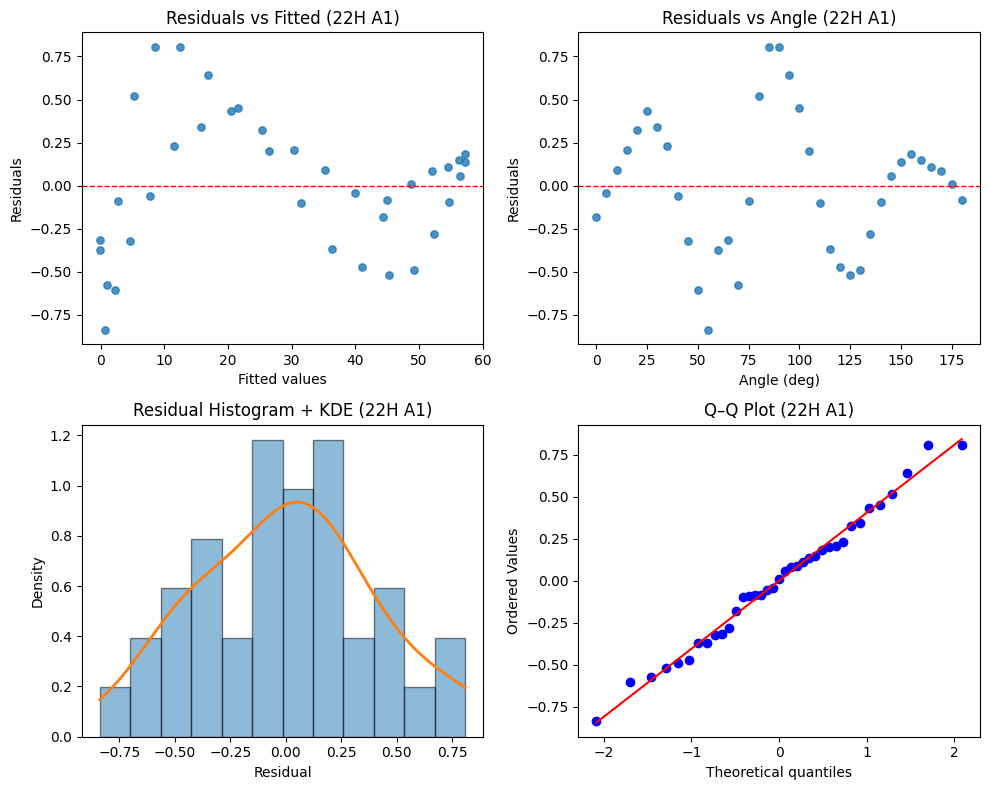

In [26]:
x = angles
y = Axx    # here specify Axx (A1)

params, cov = fit_cosine(x, y)
y_pred = cosine_model(x, *params)
residuals = y - y_pred

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
(ax1, ax2), (ax3, ax4) = axes

# 1) Residuals vs. Fitted Values
ax1.scatter(y_pred, residuals, s=28, alpha=0.8)
ax1.axhline(0, color='r', ls='--', lw=1)
ax1.set_xlabel("Fitted values")
ax1.set_ylabel("Residuals")
ax1.set_title("Residuals vs Fitted (22H A1)")

# 2) Residuals vs. independent variables (angles)
ax2.scatter(x, residuals, s=28, alpha=0.8)
ax2.axhline(0, color='r', ls='--', lw=1)
ax2.set_xlabel("Angle (deg)")
ax2.set_ylabel("Residuals")
ax2.set_title("Residuals vs Angle (22H A1)")

# 3) Residual Histogram + KDE
ax3.hist(residuals, bins=12, density=True, alpha=0.5, edgecolor='k')
xs = np.linspace(residuals.min(), residuals.max(), 256)
kde = stats.gaussian_kde(residuals)
ax3.plot(xs, kde(xs), lw=2)
ax3.set_xlabel("Residual")
ax3.set_ylabel("Density")
ax3.set_title("Residual Histogram + KDE (22H A1)")

# 4) QQ plot
stats.probplot(residuals, dist="norm", plot=ax4)
ax4.set_title("Q–Q Plot (22H A1)")

plt.tight_layout()
plt.show()


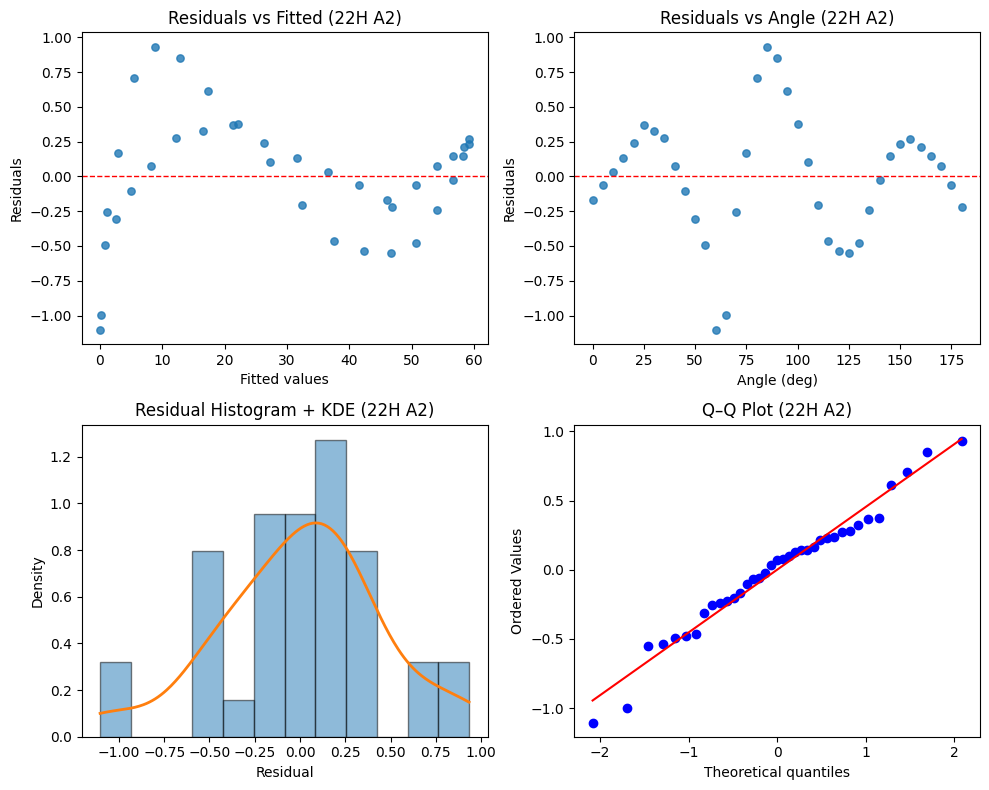

In [27]:
x = angles
y = Ayy    # here specify Ayy (A2)

params, cov = fit_cosine(x, y)
y_pred = cosine_model(x, *params)
residuals = y - y_pred

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
(ax1, ax2), (ax3, ax4) = axes

# 1) Residuals vs. Fitted Values
ax1.scatter(y_pred, residuals, s=28, alpha=0.8)
ax1.axhline(0, color='r', ls='--', lw=1)
ax1.set_xlabel("Fitted values")
ax1.set_ylabel("Residuals")
ax1.set_title("Residuals vs Fitted (22H A2)")

# 2) Residuals vs. independent variables (angles)
ax2.scatter(x, residuals, s=28, alpha=0.8)
ax2.axhline(0, color='r', ls='--', lw=1)
ax2.set_xlabel("Angle (deg)")
ax2.set_ylabel("Residuals")
ax2.set_title("Residuals vs Angle (22H A2)")

# 3) Residual Histogram + KDE
ax3.hist(residuals, bins=12, density=True, alpha=0.5, edgecolor='k')
xs = np.linspace(residuals.min(), residuals.max(), 256)
kde = stats.gaussian_kde(residuals)
ax3.plot(xs, kde(xs), lw=2)
ax3.set_xlabel("Residual")
ax3.set_ylabel("Density")
ax3.set_title("Residual Histogram + KDE (22H A2)")

# 4) QQ plot
stats.probplot(residuals, dist="norm", plot=ax4)
ax4.set_title("Q–Q Plot (22H A2)")

plt.tight_layout()
plt.show()

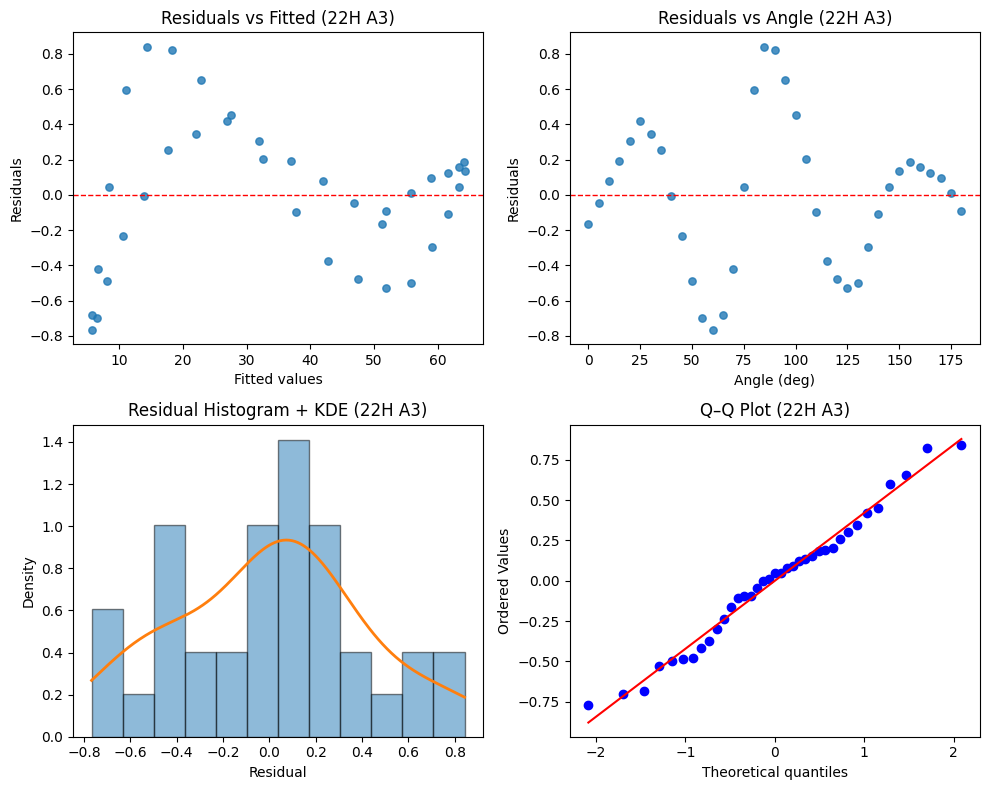

In [28]:
x = angles
y = Azz    # here specify Azz (A3)

params, cov = fit_cosine(x, y)
y_pred = cosine_model(x, *params)
residuals = y - y_pred

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
(ax1, ax2), (ax3, ax4) = axes

# 1) Residuals vs. Fitted Values
ax1.scatter(y_pred, residuals, s=28, alpha=0.8)
ax1.axhline(0, color='r', ls='--', lw=1)
ax1.set_xlabel("Fitted values")
ax1.set_ylabel("Residuals")
ax1.set_title("Residuals vs Fitted (22H A3)")

# 2) Residuals vs. independent variables (angles)
ax2.scatter(x, residuals, s=28, alpha=0.8)
ax2.axhline(0, color='r', ls='--', lw=1)
ax2.set_xlabel("Angle (deg)")
ax2.set_ylabel("Residuals")
ax2.set_title("Residuals vs Angle (22H A3)")

# 3) Residual Histogram + KDE
ax3.hist(residuals, bins=12, density=True, alpha=0.5, edgecolor='k')
xs = np.linspace(residuals.min(), residuals.max(), 256)
kde = stats.gaussian_kde(residuals)
ax3.plot(xs, kde(xs), lw=2)
ax3.set_xlabel("Residual")
ax3.set_ylabel("Density")
ax3.set_title("Residual Histogram + KDE (22H A3)")

# 4) QQ plot
stats.probplot(residuals, dist="norm", plot=ax4)
ax4.set_title("Q–Q Plot (22H A3)")

plt.tight_layout()
plt.show()